In [17]:
# pyTorch code with a ConvNet
# also, a focus on Data Processing

# roughly following:
# https://www.youtube.com/watch?v=9aYuQmMJvjA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import cv2

import os

from tqdm import tqdm

In [18]:
REBUILD_DATA = False # do not pre-process data if unnecessary
# set to true if you'd like to!

In [19]:
class DogsCats():
    IMG_SIZE = 50
    CATS = "data/PetImages/Cat"
    DOGS = "data/PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            
            for f in tqdm(os.listdir(label)):
                try: # skip bad images
                    path = os.path.join(label, f)
                    # possible TODO: experiment with the effect of adding color
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
                    img = cv2.resize(img, (self.IMG_SIZE    , self.IMG_SIZE    ))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    if label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
                    #print(str(e))
                    
        np.random.shuffle(self.training_data) # np shuffle is in-place
        np.save("data/PetImages/training_data.npy", self.training_data)
        
        print(f"Cats: {self.catcount}")
        print(f"Dogs: {self.dogcount}")
        
if REBUILD_DATA:
    data = DogsCats()
    data.make_training_data()
    REBUILD_DATA = False

In [20]:
training_data = np.load("data/PetImages/training_data.npy", allow_pickle = True)
print(len(training_data))

24946


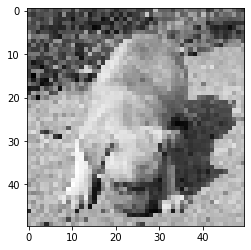

In [21]:
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [ ]:
class Net(nn.Module):
    